In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
import numpy as np
import math
from sklearn.externals import joblib 

C:\Users\iamrk\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df_buffet = pd.read_csv("processed_buffet.csv")
df_buffet = df_buffet.head(1953)
dict_date = dict()
for i in range(len(df_buffet["Date"])):
    if df_buffet["Date"][i] not in dict_date:
        dict_date[df_buffet["Date"][i]] = df_buffet["Football"][i] + df_buffet["Homecoming"][i] + df_buffet["Easter"][i]
    df_buffet["Football"][i] = df_buffet["Football"][i] + df_buffet["Homecoming"][i] + df_buffet["Easter"][i]


C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
print(dict_date)

{'Saturday, December 21, 2019': 0.0, 'Friday, December 20, 2019': 0.0, 'Thursday, December 19, 2019': 0.0, 'Wednesday, December 18, 2019': 0.0, 'Tuesday, December 17, 2019': 0.0, 'Monday, December 16, 2019': 0.0, 'Sunday, December 15, 2019': 0.0, 'Saturday, December 14, 2019': 0.0, 'Friday, December 13, 2019': 0.0, 'Thursday, December 12, 2019': 0.0, 'Wednesday, December 11, 2019': 0.0, 'Tuesday, December 10, 2019': 0.0, 'Monday, December 9, 2019': 0.0, 'Sunday, December 8, 2019': 0.0, 'Saturday, December 7, 2019': 0.0, 'Friday, December 6, 2019': 0.0, 'Thursday, December 5, 2019': 0.0, 'Wednesday, December 4, 2019': 0.0, 'Tuesday, December 3, 2019': 0.0, 'Monday, December 2, 2019': 0.0, 'Friday, November 22, 2019': 0.0, 'Thursday, November 21, 2019': 0.0, 'Wednesday, November 20, 2019': 0.0, 'Tuesday, November 19, 2019': 0.0, 'Monday, November 18, 2019': 0.0, 'Sunday, November 17, 2019': 0.0, 'Saturday, November 16, 2019': 1.0, 'Friday, November 15, 2019': 0.0, 'Thursday, November 14,

In [3]:
Football = pd.Series()
Location = pd.Series()

df_p_commons = pd.read_csv("pollock_commons.csv")

for i in range(len(df_p_commons["Date"])):
    if df_p_commons["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_p_commons["Date"][i]])
for i in range(len(df_p_commons["Date"])):
    a = df_p_commons["Date"][i].split(", ")
    df_p_commons["Date"][i] = int(a[2])
for i in range(len(df_p_commons["Semester"])):
    if(df_p_commons["Semester"][i]) == "FA":
        df_p_commons["Semester"][i] = 1
    else:
        df_p_commons["Semester"][i] = 0
for i in range(len(df_p_commons["Meal"])):
    Location.set_value(i, 0)
    if(df_p_commons["Meal"][i]) == "Breakfast":
        df_p_commons["Meal"][i] = 0
    elif df_p_commons["Meal"][i] == "Lunch":
        df_p_commons["Meal"][i] = 1
    else:
        df_p_commons["Meal"][i] = 2
for i in range(len(df_p_commons["Date"])):
    if df_p_commons["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_mix["Date"][i]])
df_p_commons["Location"] = Location
df_p_commons['Football'] = Football

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [4]:
Football = pd.Series()
Location = pd.Series()

df_mix = pd.read_csv("mix.csv")
for i in range(len(df_mix["Date"])):
    if df_mix["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_mix["Date"][i]])
for i in range(len(df_mix["Date"])):
    a = df_mix["Date"][i].split(", ")
    df_mix["Date"][i] = int(a[2])
for i in range(len(df_mix["Semester"])):
    if(df_mix["Semester"][i]) == "FA":
        df_mix["Semester"][i] = 1
    else:
        df_mix["Semester"][i] = 0
for i in range(len(df_mix["Meal"])):
    Location.set_value(i, 1)
    if(df_mix["Meal"][i]) == "Breakfast":
        df_mix["Meal"][i] = 0
    elif df_mix["Meal"][i] == "Lunch":
        df_mix["Meal"][i] = 1
    else:
        df_mix["Meal"][i] = 2
df_mix

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Meal,Date,Customers,Revenue,Day Of Week,Temp,Percipitation Amt,Snow Amount,NOAA Event,Semester,Week Num
0,2,2019,560,"$1,829.00",5,45.5,0.0,0.0,0,0,12
1,1,2019,493,"$1,670.00",5,45.5,0.0,0.0,0,0,12
2,0,2019,284,$658.00,5,45.5,0.0,0.0,0,0,12
3,2,2019,652,"$2,227.00",4,37.5,0.0,0.0,0,0,12
4,1,2019,473,"$1,622.00",4,37.5,0.0,0.0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...
1525,1,2017,542,"$1,857.00",3,17.5,0.0,0.0,0,0,1
1526,0,2017,338,$768.00,3,17.5,0.0,0.0,0,0,1
1527,2,2017,2252,$667.00,2,12.5,0.0,0.0,0,0,1
1528,1,2017,1636,$489.00,2,12.5,0.0,0.0,0,0,1


In [5]:
df_mix["Football"] = Football
df_mix["Location"] = Location
df_mix = df_mix[["Meal", "Date", "Day Of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]
df_p_commons = df_p_commons[["Meal", "Date", "Day of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]

df_mix.rename(columns = {'Day Of Week':'Day of Week'}, inplace = True) 


C:\Users\iamrk\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [7]:
Football = pd.Series()
Location = pd.Series()

df_edge = pd.read_csv("edge.csv")
for i in range(len(df_edge["Date"])):
    if df_edge["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_edge["Date"][i]])
for i in range(len(df_edge["Date"])):
    a = df_edge["Date"][i].split(", ")
    df_edge["Date"][i] = int(a[2])
for i in range(len(df_edge["Semester"])):
    if(df_edge["Semester"][i]) == "FA":
        df_edge["Semester"][i] = 1
    else:
        df_edge["Semester"][i] = 0
for i in range(len(df_edge["Meal"])):
    Location.set_value(i, 2)
    if(df_edge["Meal"][i]) == "Breakfast":
        df_edge["Meal"][i] = 0
    elif df_edge["Meal"][i] == "Lunch":
        df_edge["Meal"][i] = 1
    else:
        df_edge["Meal"][i] = 2
df_edge["Football"] = Football
df_edge["Location"] = Location
df_edge = df_edge[["Meal", "Date", "Day of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]
df_edge

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and wil

,Meal,Date,Day of Week,Temp,Location,Percipitation Amt,Snow Amount,NOAA Event,Semester,Week Num,Football,Customers
0,0,2019,6,17.5,2,0.00,0.0,0,1,16,0.0,134
1,1,2019,6,17.5,2,0.00,0.0,0,1,16,0.0,19
2,0,2019,5,20.5,2,0.03,0.5,0,1,16,0.0,237
3,1,2019,5,20.5,2,0.03,0.5,0,1,16,0.0,155
4,2,2019,5,20.5,2,0.03,0.5,0,1,16,0.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
317,1,2019,3,65.0,2,0.02,0.0,0,1,1,0.0,119
318,2,2019,3,65.0,2,0.02,0.0,0,1,1,0.0,56
319,0,2019,2,62.5,2,0.00,0.0,0,1,1,0.0,252
320,1,2019,2,62.5,2,0.00,0.0,0,1,1,0.0,89


In [8]:
df = pd.concat([df_p_commons, df_mix, df_edge])
df_p_commons["Meal"] = pd.to_numeric(df_p_commons["Meal"])

df_p_commons["Date"] = pd.to_numeric(df_p_commons["Date"])
df_p_commons["Semester"] = pd.to_numeric(df_p_commons["Semester"])
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
clf = SVR(C = 770.0, epsilon = 14, kernel='rbf', max_iter = 80000, gamma = 'auto', shrinking = True) 
clf.fit(X_train, y_train)
y_test = np.array(y_test)
preds = clf.predict(X_test)
# math.sqrt(mean_squared_error(y_test, preds))
df

,Meal,Date,Day of Week,Temp,Location,Percipitation Amt,Snow Amount,NOAA Event,Semester,Week Num,Football,Customers
0,1,2019,6,17.5,0,0.00,0.0,0,1,16,0.0,151
1,0,2019,6,17.5,0,0.00,0.0,0,1,16,0.0,151
2,2,2019,5,20.5,0,0.03,0.5,0,1,16,0.0,416
3,1,2019,5,20.5,0,0.03,0.5,0,1,16,0.0,400
4,0,2019,5,20.5,0,0.03,0.5,0,1,16,0.0,195
...,...,...,...,...,...,...,...,...,...,...,...,...
317,1,2019,3,65.0,2,0.02,0.0,0,1,1,0.0,119
318,2,2019,3,65.0,2,0.02,0.0,0,1,1,0.0,56
319,0,2019,2,62.5,2,0.00,0.0,0,1,1,0.0,252
320,1,2019,2,62.5,2,0.00,0.0,0,1,1,0.0,89


In [9]:
from sklearn.metrics import r2_score, make_scorer
r2_scorer = make_scorer(r2_score)
df["Meal"] = pd.to_numeric(df["Meal"])
df["Date"] = pd.to_numeric(df["Date"])
df["Semester"] = pd.to_numeric(df["Semester"])
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
eval_set = [(X_test, y_test)]
xgb_reg = xgb.XGBRegressor(max_depth=18, gamma = 1, max_delta_step = 50, subsample = 0.7, sampling_method = 'gradient_based', reg_lambda = 2, grow_policy='depthwise', normalize_type = 'forest', csv_weights=5, num_round = 1200, nfold = 10, nrounds = 10,n_estimators=1000000, base_score = 761.4366740088105, min_child_weight=5, eta=0.1,seed=4)
xgb_fit = xgb_reg.fit(X_train, y_train, eval_set = eval_set, eval_metric = "rmse", early_stopping_rounds =70)



[0]	validation_0-rmse:392.08743
Will train until validation_0-rmse hasn't improved in 70 rounds.
[1]	validation_0-rmse:388.53323
[2]	validation_0-rmse:385.01034
[3]	validation_0-rmse:381.52039
[4]	validation_0-rmse:378.06427
[5]	validation_0-rmse:374.65176
[6]	validation_0-rmse:371.21658
[7]	validation_0-rmse:367.86475
[8]	validation_0-rmse:364.54037
[9]	validation_0-rmse:361.27136
[10]	validation_0-rmse:357.48566
[11]	validation_0-rmse:353.69974
[12]	validation_0-rmse:349.96051
[13]	validation_0-rmse:346.62677
[14]	validation_0-rmse:343.41608
[15]	validation_0-rmse:340.23770
[16]	validation_0-rmse:337.09570
[17]	validation_0-rmse:333.42844
[18]	validation_0-rmse:329.72995
[19]	validation_0-rmse:326.57162
[20]	validation_0-rmse:322.76724
[21]	validation_0-rmse:319.17728
[22]	validation_0-rmse:316.01270
[23]	validation_0-rmse:312.25012
[24]	validation_0-rmse:308.40939
[25]	validation_0-rmse:305.39557
[26]	validation_0-rmse:301.67490
[27]	validation_0-rmse:298.01764
[28]	validation_0-rms

[247]	validation_0-rmse:82.39546
[248]	validation_0-rmse:82.47871
[249]	validation_0-rmse:82.55254
[250]	validation_0-rmse:82.57512
[251]	validation_0-rmse:82.46624
[252]	validation_0-rmse:82.44647
[253]	validation_0-rmse:82.64014
[254]	validation_0-rmse:82.70361
[255]	validation_0-rmse:82.63015
[256]	validation_0-rmse:82.68710
[257]	validation_0-rmse:82.77732
[258]	validation_0-rmse:82.78419
[259]	validation_0-rmse:82.87869
[260]	validation_0-rmse:82.88765
[261]	validation_0-rmse:82.77482
[262]	validation_0-rmse:82.84561
[263]	validation_0-rmse:82.72119
[264]	validation_0-rmse:82.71061
[265]	validation_0-rmse:82.76341
[266]	validation_0-rmse:82.74236
[267]	validation_0-rmse:82.71254
[268]	validation_0-rmse:82.72590
[269]	validation_0-rmse:82.80321
[270]	validation_0-rmse:82.82307
[271]	validation_0-rmse:82.92821
[272]	validation_0-rmse:82.98788
[273]	validation_0-rmse:83.04717
[274]	validation_0-rmse:83.08323
[275]	validation_0-rmse:83.11528
[276]	validation_0-rmse:83.03240
[277]	vali

In [11]:
xgb_fit.save_model("../1.model")

In [54]:
from sklearn.metrics import r2_score
preds = xgb_fit.predict(X_test)
r2_score(y_test, preds)

0.9444658636305648

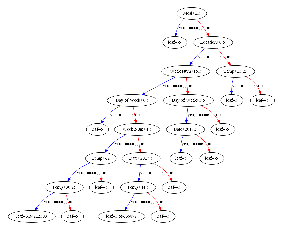

In [23]:
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_fit)
plt.savefig("xgboost_tree.png", bbox_inches = "tight", dpi = 600)


AxesSubplot(0.125,0.125;0.775x0.755)


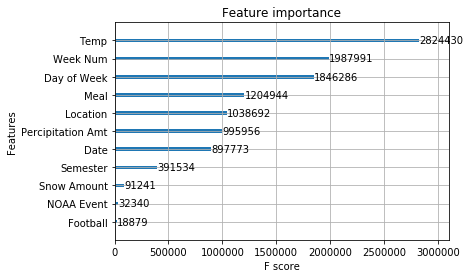

In [15]:
from xgboost import plot_importance
print(plot_importance(xgb_fit))

In [25]:
fig = plt.figure(figsize=(10,5))
